In [17]:
from mpi4py import MPI
import numpy as np
%run ../aux_funcs.py
%run ../RSRG.py
%run ../RSRG_class.py
from copy import deepcopy

In [42]:
comm = MPI.COMM_WORLD
rank = comm.Get_rank() # get your process ID
n_processes = comm.size


L = 30
steps = int(0.95*L*L)
measure_step = 20
a, b = 0.1, 0.1
ind_dict, adj_ind = triangle_lattice_dictionary(L)
nn_ind = triangle_nn_indices(L)
nnn_ind = triangle_nnn_indices(L)

n_runs = 1


data = [[1]]*n_processes   # init the data    

#if rank == 0: # The master is the only process that reads the file
#    data = data# something read from file

# Divide the data among processes
data = comm.scatter(data, root=0)
index = 0

R0_array_sum = np.zeros(shape=(n_processes, int(np.ceil(steps/measure_step - 1))))
for item in data:  #Sending to processes
    for inst in range(n_runs):  #Within each process
        J_ij_vals = fill_J_ij_matrix(L*L, nn_ind, nnn_ind, a, b)
        h_vals = np.exp(-np.random.exponential(size=L*L))
        test = system(L*L, deepcopy(adj_ind), J_ij_vals, h_vals) 
        for i in range(steps):
            test.decimate()
        print(index)
        R0_array_sum[index,:] += np.array(test.R0_array)
        index += 1
# Send the results back to the master processes
newData = comm.gather(result,root=0)



0


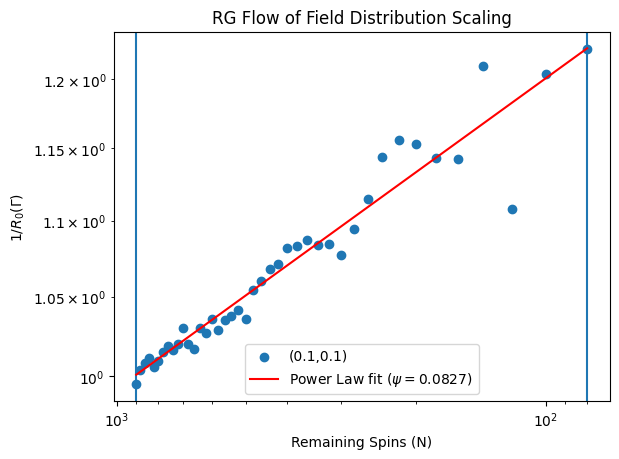

In [55]:
measure_step = 20
x = L*L - np.arange(int(steps/measure_step))*measure_step

#R_length = len(y)

start = 0
end = -1

plt.axvline(x = x[start])
plt.axvline(x = x[end])

y = n_runs*n_processes/ np.array(R0_array_sum.sum(axis=0))#R0_array[a_ind,:]
plt.scatter(x, y, label="("+str(a)+","+str(b)+")")#, yerr=np.sqrt(np.array(R0_array_err))/np.array(R0_array)**2)


#plt.yscale('log')

popt, pcov = curve_fit(power_law_scale, x[start:end], y[start:end])


plt.title("RG Flow of Field Distribution Scaling")
plt.xlabel("Remaining Spins (N)")
plt.ylabel(r"$1/R_0(\Gamma)$")
plt.plot(x, power_law_scale(x, *popt), color='red', label=r'Power Law fit ($\psi=$'+str(round(popt[0], 4))+')')

plt.gca().invert_xaxis()
plt.legend()
plt.yscale('log')
plt.xscale('log')

#plt.xlim(1e4, 0.8*1e3)

In [49]:
x

array([900, 880, 860, 840, 820, 800, 780, 760, 740, 720, 700, 680, 660,
       640, 620, 600, 580, 560, 540, 520, 500, 480, 460, 440, 420, 400,
       380, 360, 340, 320, 300, 280, 260, 240, 220, 200, 180, 160, 140,
       120, 100,  80])

In [54]:
R0_array_sum.sum(axis=0)

array([1.00492014, 0.99625225, 0.99214524, 0.98912843, 0.99422784,
       0.99091039, 0.98521585, 0.98129923, 0.98410624, 0.98044012,
       0.97107616, 0.98022738, 0.9832307 , 0.97090458, 0.97400351,
       0.96550513, 0.97219587, 0.96614696, 0.96374332, 0.96012843,
       0.9655411 , 0.94867115, 0.94329255, 0.93628259, 0.9334652 ,
       0.9245878 , 0.92294138, 0.92007445, 0.92252016, 0.9221907 ,
       0.92814113, 0.91344196, 0.89682738, 0.87423095, 0.86496084,
       0.86714354, 0.87497073, 0.87506532, 0.82656291, 0.90233987,
       0.83063212, 0.81806968])

In [58]:
import time
time.

AttributeError: module 'time' has no attribute 'today'